#PIPELINE

###Installing the noise reduce library

In [ ]:
!pip install noisereduce

###Necessary libraries

In [ ]:
import os
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import noisereduce as nr
import seaborn as sns


In [ ]:
a=input("Enter the file path: ")
b= input("Enter the word of name = ")

Enter the file path: /content/drive/MyDrive/project/audio wav/London.wav
Enter the word of name = London


###LOADING THE AUDIO

In [ ]:
# load audio file in the player
file_path = a
ipd.Audio(file_path)

#REMOVING NOISE

In [ ]:
y_noise,sample_rate=librosa.load(a)
y = nr.reduce_noise(y=y_noise,sr=sample_rate)

In [ ]:
len(y)

27276

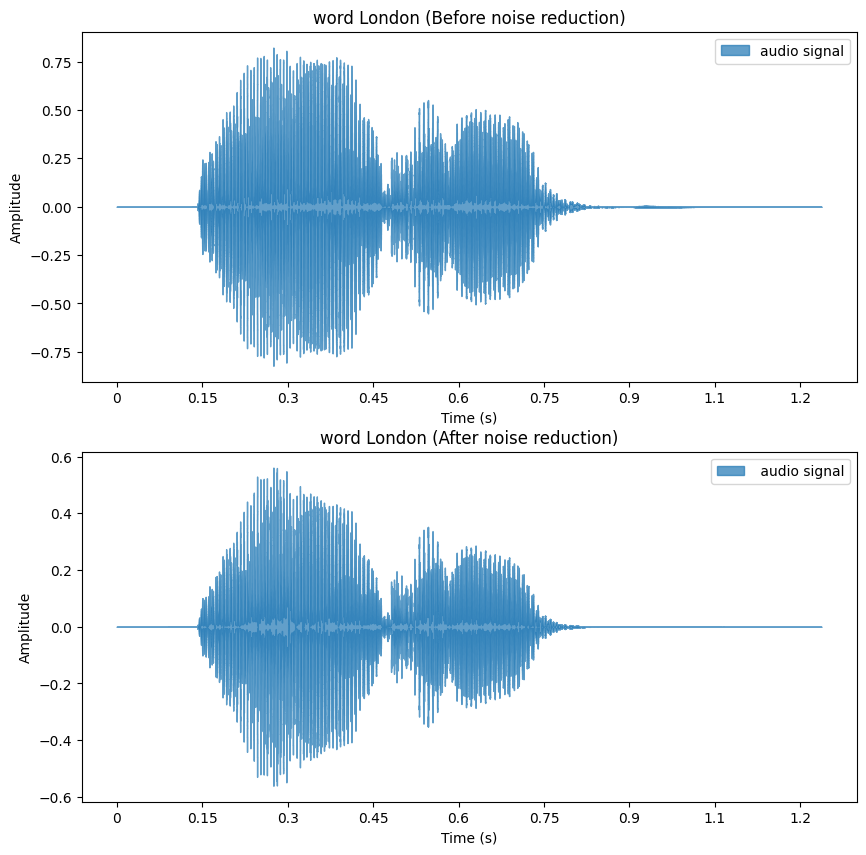

In [ ]:
plt.figure(figsize=(10,10))
ax=plt.subplot(2,1,1)
librosa.display.waveshow(y_noise,sr=sample_rate, alpha =0.7, label="audio signal")
plt.title(f'word {b} (Before noise reduction)')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
ax=plt.subplot(2,1,2)
librosa.display.waveshow(y,sr=sample_rate, alpha =0.7, label=" audio signal")

plt.title(f'word {b} (After noise reduction)')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

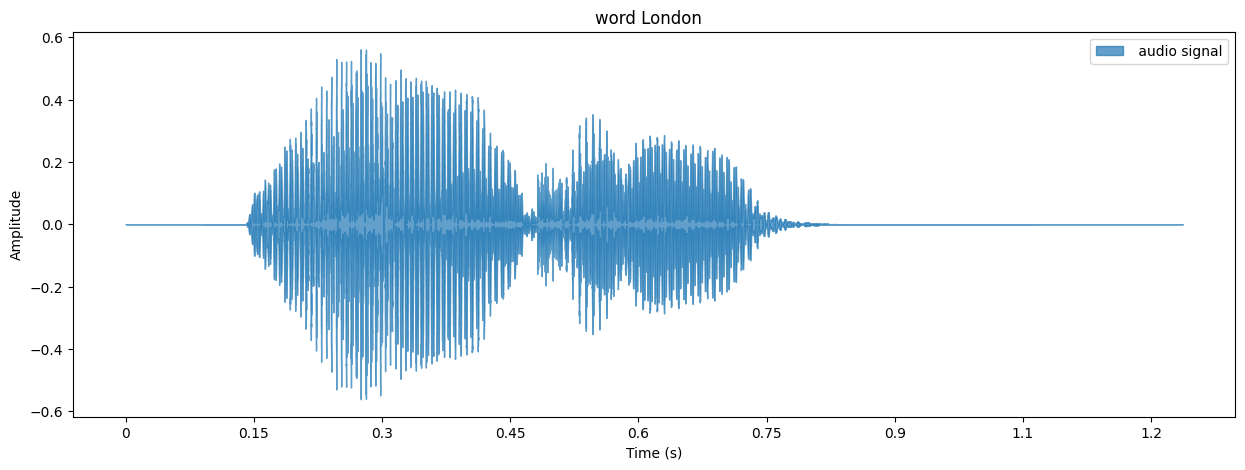

In [ ]:
plt.figure(figsize=(15,5))
librosa.display.waveshow(y,sr=sample_rate, alpha =0.7, label=" audio signal")
plt.title(f'word {b}  ')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

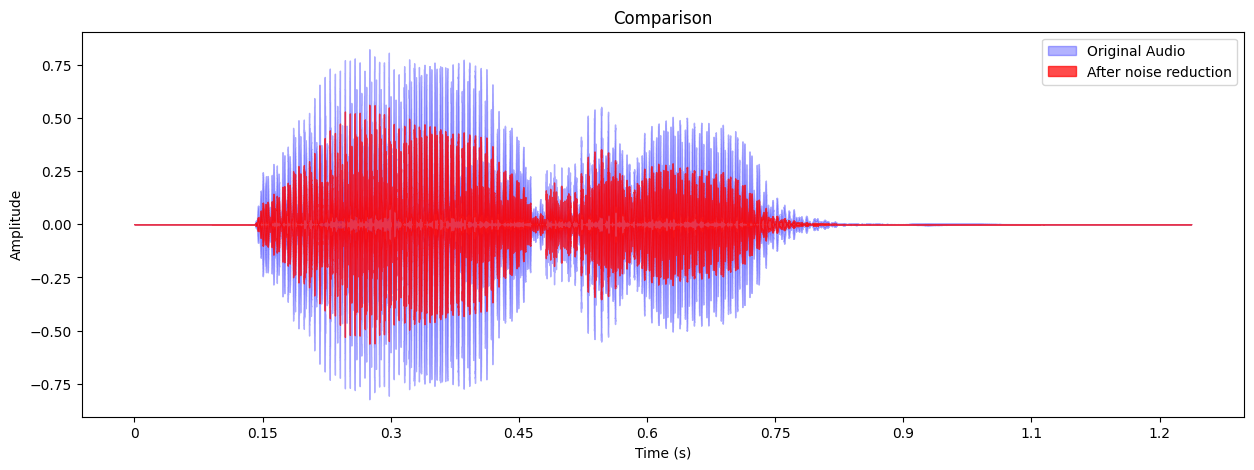

In [ ]:
#This is for more understanding of the how much the noise is reduced by the plot
plt.figure(figsize=(15,5))
librosa.display.waveshow(y_noise, sr=sample_rate, alpha=0.3, label='Original Audio', color='blue')
librosa.display.waveshow(y, sr=sample_rate, alpha=0.7, label='After noise reduction', color='red')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Comparison')
plt.legend()
plt.show()

#MFCC

In [ ]:
# Compute MFCCs
mfccs = librosa.feature.mfcc(y=y, sr=sample_rate, n_mfcc=13)

# Normalize MFCCs
mfccs = librosa.util.normalize(mfccs)


#RMS

In [ ]:
def rms(signal,frame_size,hop_length):
  rms=[]
  for i in range(0,len(signal),hop_length):
    rms_current_frame=np.sqrt(np.sum(signal[i:i+frame_size]**2)/frame_size)
    rms.append(rms_current_frame)
  return np.array(rms)

In [ ]:
frame_size=200
hop_size=50
rms=rms(y,frame_size,hop_size)
t = librosa.frames_to_time(range(len(rms)), hop_length=50)

Text(0, 0.5, 'RMS')

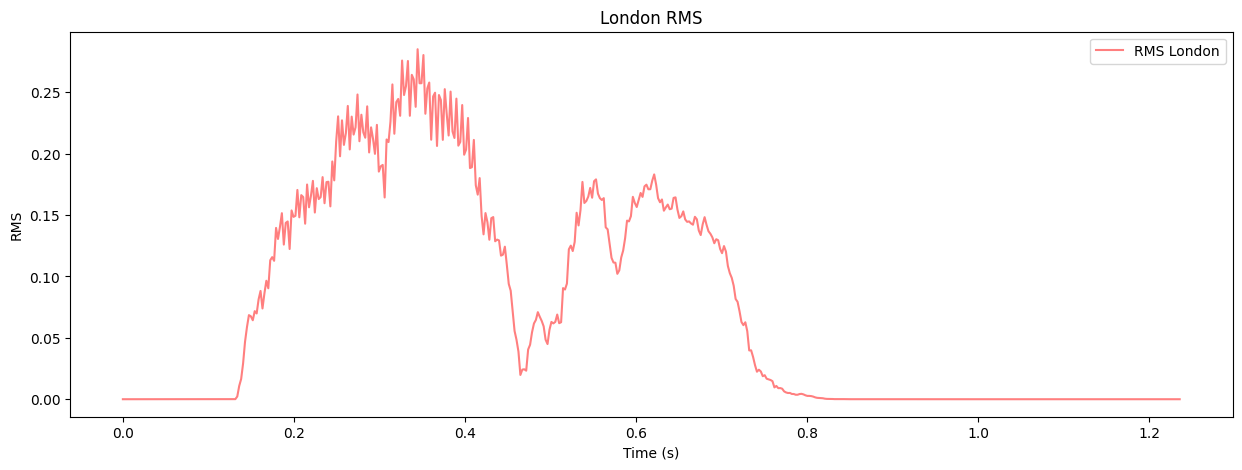

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(t,rms,alpha=0.5,color='red',label= f'RMS {b}')
plt.title(f'{b} RMS')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('RMS')

#ZCR

In [ ]:
zcr=librosa.feature.zero_crossing_rate(y=y,frame_length=frame_size,hop_length=hop_size)[0]

Text(0, 0.5, 'ZCR')

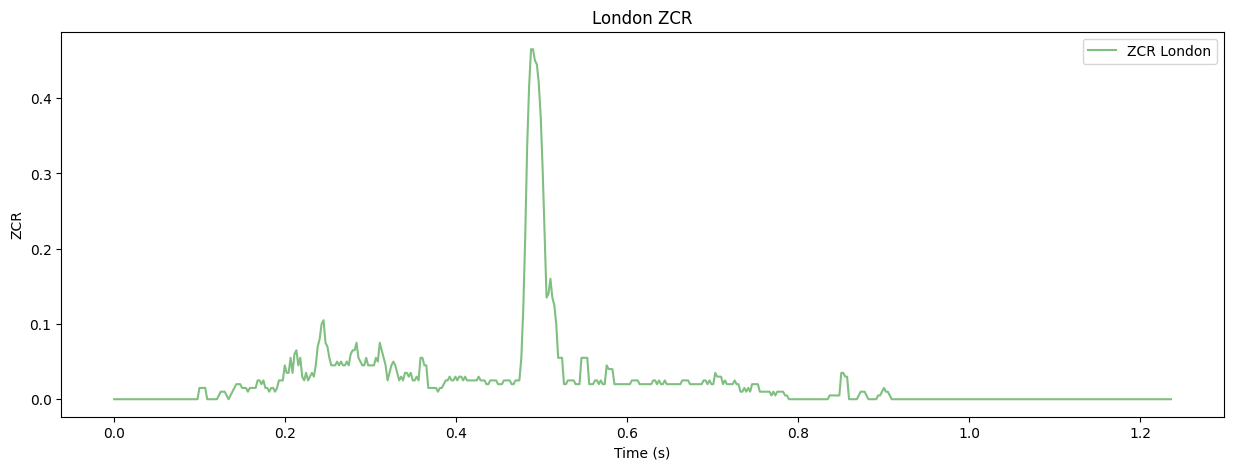

In [ ]:
# ax=plt.subplot(4,1,2)
plt.figure(figsize=(15,5))
plt.plot(t,zcr,alpha=0.5,color='green',label= f'ZCR {b}')
plt.title(f'{b} ZCR')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('ZCR')


#USING SHORT TIME FOURIER TRASNFORM ANALYSING THE FORMANTS FREQUENCY

In [ ]:
sft=librosa.stft(y,n_fft=frame_size,hop_length=hop_size)

In [ ]:
stft_db = librosa.amplitude_to_db(np.abs(sft), ref=np.max)

In [ ]:
min_distance = 10  # Minimum distance between peaks
prominence_threshold = 10  # Prominence threshold for peak picking

In [ ]:
# Initialize lists to store formant frequencies
formants = []

# Iterate over each time frame in the STFT spectrogram
for frame in stft_db.T:
    # Find peaks in the magnitude spectrum of the frame
    peaks, sr = find_peaks(frame, distance=min_distance, prominence=prominence_threshold)
    # Add the frequencies of the peaks to the formants list

    formants.append(peaks * sample_rate/ frame_size)

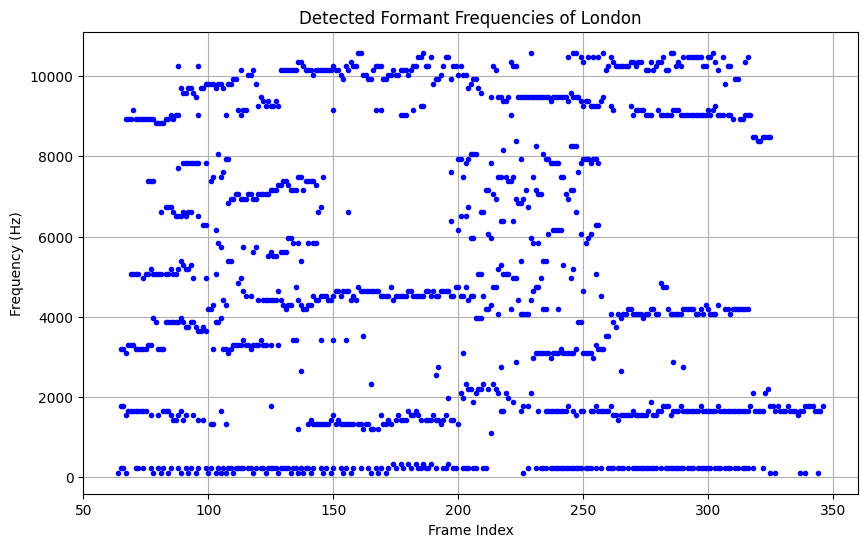

In [ ]:
# Plot formant frequencies
plt.figure(figsize=(10, 6))

# Iterate over each frame and plot formant frequencies
for i, f in enumerate(formants):
    plt.plot([i] * len(f), f, 'bo', markersize=3)  # Plotting formant frequencies for each frame

plt.xlabel('Frame Index')
plt.ylabel('Frequency (Hz)')
plt.title(f'Detected Formant Frequencies of {b}')
plt.grid(True)
plt.show()


In [ ]:
len(formants)

546

In [ ]:
# Typical male formant frequencies for schwa
f1_expected = 500  # F1 = 500 Hz
f2_expected = 1500  # F2 = 1500 Hz
f3_expected = 2500  # F3 = 2500 Hz

In [ ]:
f1=[]
f2=[]
f3=[]
for i, f in enumerate(formants):
    if len(f) >= 3:  # Check if at least three formants are detected for the current frame
        f1_diff = np.abs(f[0] - f1_expected)
        f2_diff = np.abs(f[1] - f2_expected)
        f3_diff = np.abs(f[2] - f3_expected)
        f1.append(f1_diff)
        f2.append(f2_diff)
        f3.append(f3_diff)
        # print(f"Frame {i+1}: F1={f[0]} Hz (Diff={f1_diff} Hz), F2={f[1]} Hz (Diff={f2_diff} Hz), F3={f[2]} Hz (Diff={f3_diff} Hz)")
    else:  # If no formants are detected
        continue


In [ ]:
len(f3)

253

###visualizing all the features together

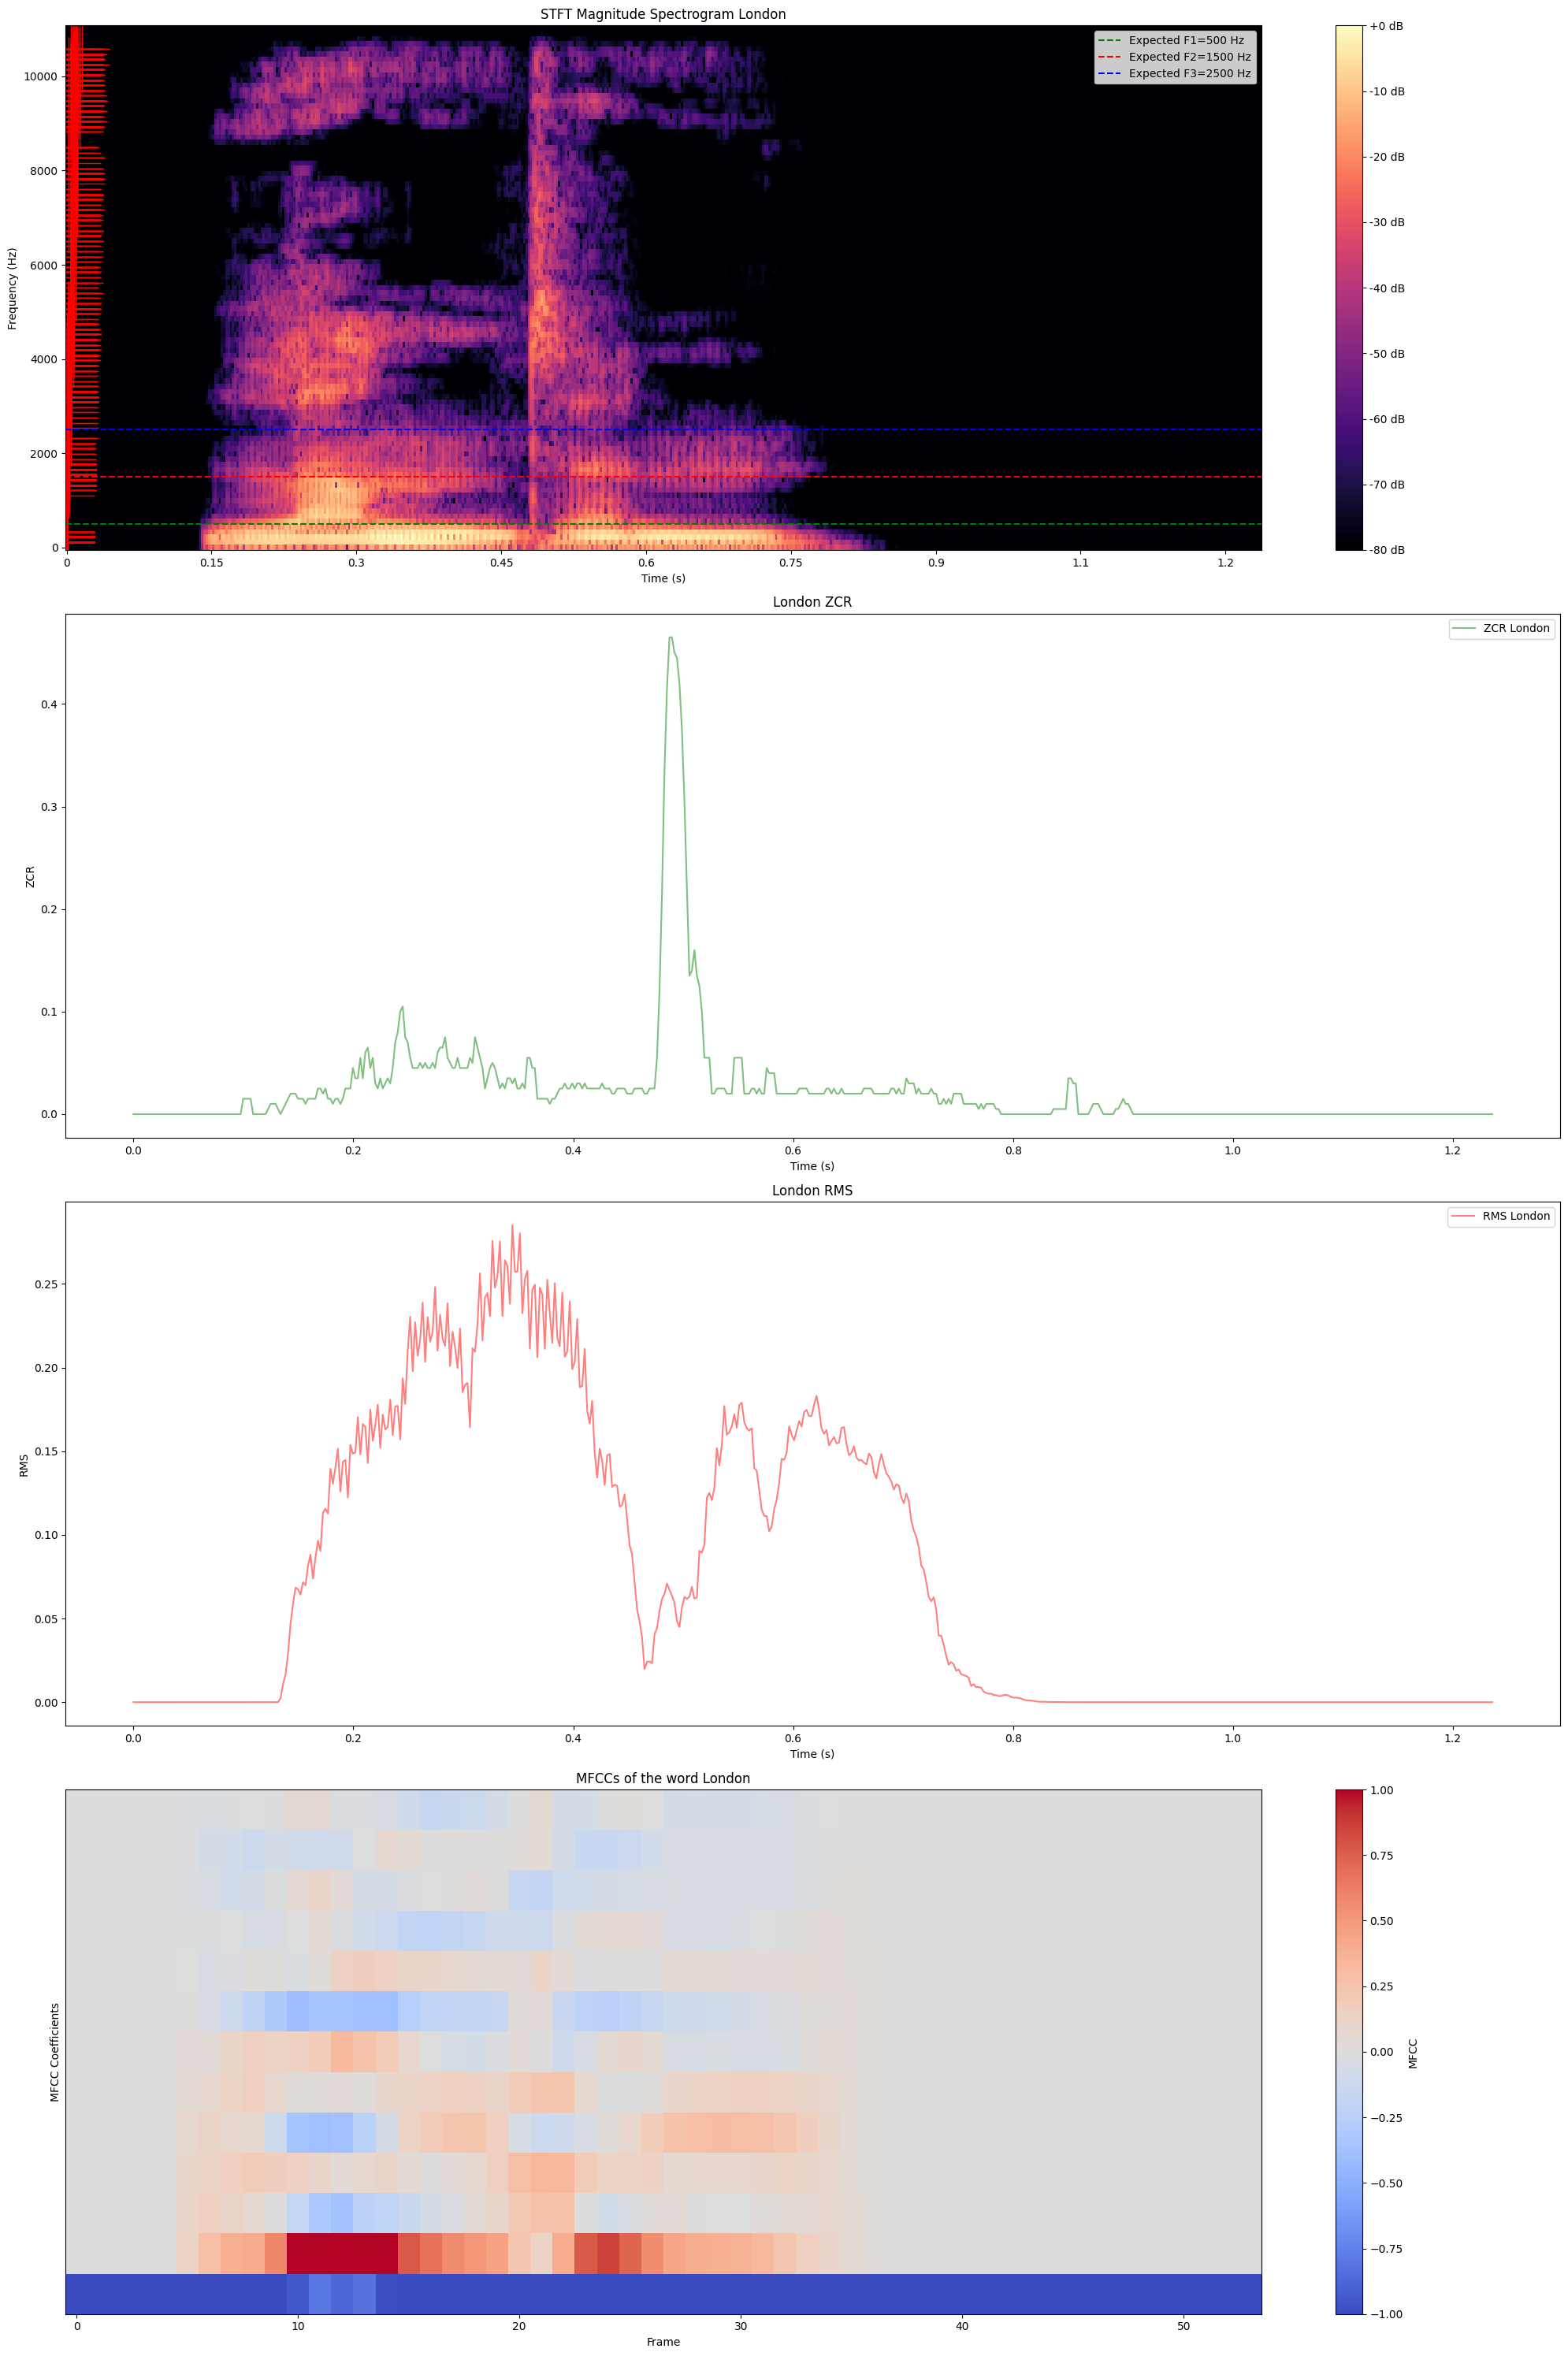

In [ ]:
plt.figure(figsize=(20, 30))
ax=plt.subplot(4,1,1)
librosa.display.specshow(stft_db, sr=sample_rate, hop_length=hop_size, x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title(f'STFT Magnitude Spectrogram {b}')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')

for f in formants:
    plt.plot(np.arange(len(f)) * 50 / sample_rate, f, 'r+', markersize=50)

plt.axhline(y=f1_expected, color='g', linestyle='--', label=f'Expected F1={f1_expected} Hz')
plt.axhline(y=f2_expected, color='r', linestyle='--', label=f'Expected F2={f2_expected} Hz')
plt.axhline(y=f3_expected, color='b', linestyle='--', label=f'Expected F3={f3_expected} Hz')

plt.legend()
plt.tight_layout()

ax=plt.subplot(4,1,2)
plt.plot(t,zcr,alpha=0.5,color='green',label= f'ZCR {b}')
plt.title(f'{b} ZCR')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('ZCR')

ax=plt.subplot(4,1,3)
plt.plot(t,rms,alpha=0.5,color='red',label= f'RMS {b}')
plt.title(f'{b} RMS')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('RMS')

ax=plt.subplot(4,1,4)
# plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='frames')
plt.colorbar(label='MFCC')
plt.title(f'MFCCs of the word {b}')
plt.xlabel('Frame')
plt.ylabel('MFCC Coefficients')
plt.tight_layout()


plt.show()







# This are the some analysing which is in the work may be in future we can add this in the pipeline

In [ ]:
import pandas as pd

In [ ]:
mfccs.flatten().shape

(702,)

In [ ]:
stft_db.flatten().shape

(55146,)

In [ ]:
max_length = max(len(stft_db.T), len(zcr), len(rms), mfccs.shape[1])
max_length

546

In [ ]:
mfccs.shape[1]

54

In [ ]:
# Pad shorter features with zeros to match the length of the longest feature
stft_db_padded = np.pad(stft_db[0], (0, max_length - len(stft_db[0])), mode='constant')
zcr_padded = np.pad(zcr, (0, max_length - len(zcr)), mode='constant')
rms_padded = np.pad(rms, (0, max_length - len(rms)), mode='constant')

# Reshape MFCCs to have the same number of frames as the longest feature
mfccs_padded = np.pad(mfccs, ((0, 0), (0, max_length - mfccs.shape[1])), mode='constant')


In [ ]:
mfccs_padded[1].shape

(546,)

In [ ]:
data = {
    'STFT_Magnitude_Spectrogram': stft_db_padded[0],
    'ZCR': zcr_padded,
    'RMS': rms_padded,
    'MFCCs': mfccs_padded[1]
}

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df.to_csv('audio_features.csv', index=False)

In [ ]:
correlation_coefficient = np.corrcoef(rms, zcr)[0,1]

print("Correlation coefficient between RMS and ZCR:", correlation_coefficient)

Correlation coefficient between RMS and ZCR: 0.231306470446469


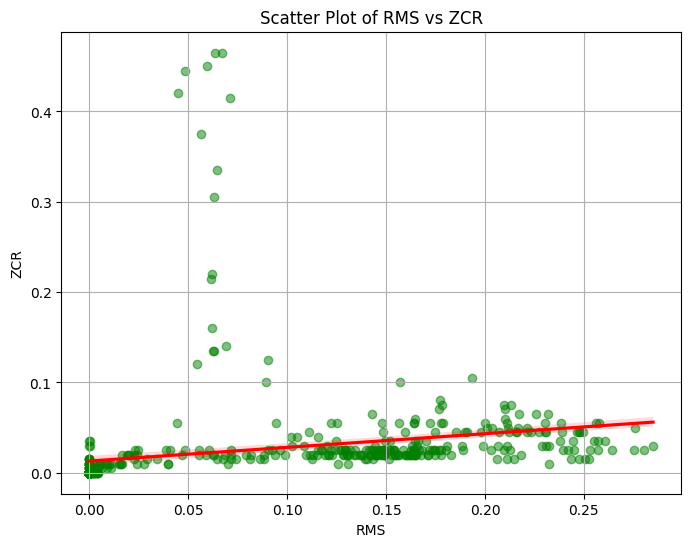

Correlation coefficient between RMS and ZCR: 0.231306470446469


In [ ]:
# Plot RMS vs ZCR with a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(rms, zcr, color='green', alpha=0.5)
plt.title('Scatter Plot of RMS vs ZCR')
plt.xlabel('RMS')
plt.ylabel('ZCR')

# Add a line of best fit
sns.regplot(x=rms, y=zcr, scatter=False, color='red')

plt.grid(True)
plt.show()

print("Correlation coefficient between RMS and ZCR:", correlation_coefficient)